In [119]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


#  Import and read the heart_disease_dataset.csv.
import pandas as pd
url= 'https://raw.githubusercontent.com/Nathanhans/project-4/main/heart_disease_dataset.csv'
heart_disease_df = pd.read_csv(url)
heart_disease_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [76]:
#confirming lenght to make sure no data was lost
len(heart_disease_df)

246022

In [77]:
# Drop the non-beneficial columns such as State
heart_disease_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [78]:
# nuniuqe to view the unique data in each column
heart_disease_df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

In [120]:
heart_disease_df= heart_disease_df.copy().drop(['State'],axis=1)

<ipython-input-131-2eaff056d140>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= heart_disease_df.corr()


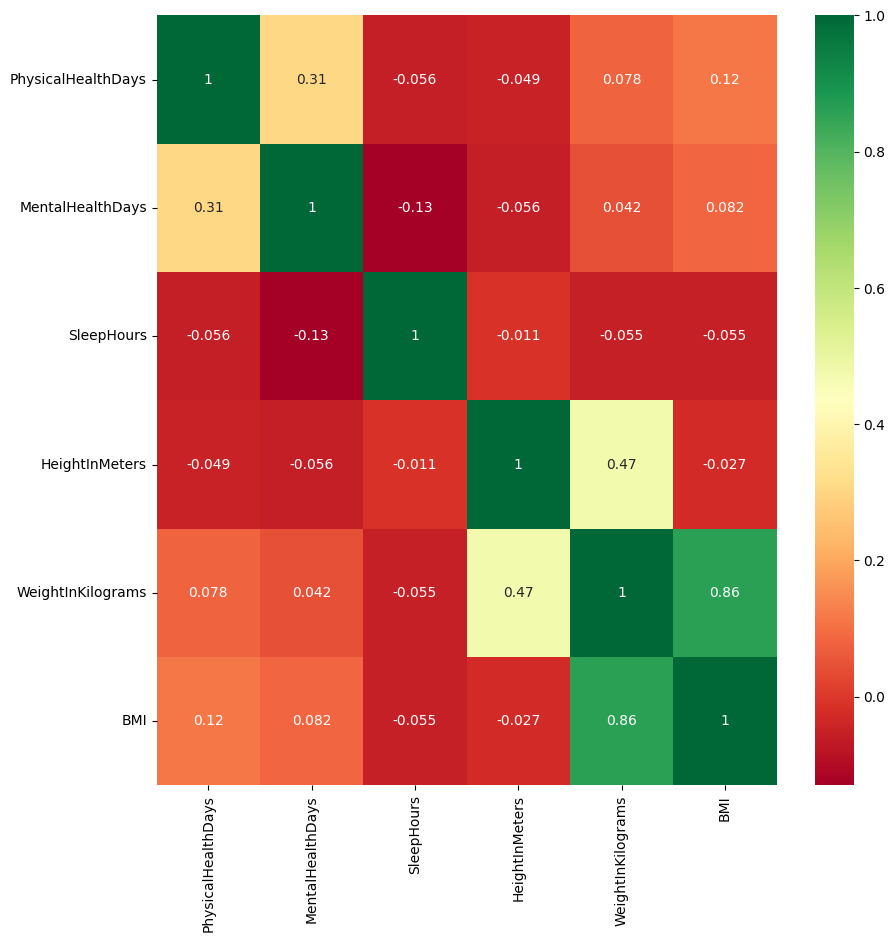

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of features in the dataset
corrmat= heart_disease_df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
g=sns.heatmap(heart_disease_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [122]:
corrmat

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.306800,-0.056063,-0.049180,0.077505,0.116905
MentalHealthDays,0.306800,1.000000,-0.130100,-0.056010,0.042441,0.082182
SleepHours,-0.056063,-0.130100,1.000000,-0.011384,-0.054691,-0.054750
HeightInMeters,-0.049180,-0.056010,-0.011384,1.000000,0.473768,-0.026637
WeightInKilograms,0.077505,0.042441,-0.054691,0.473768,1.000000,0.859313
BMI,0.116905,0.082182,-0.054750,-0.026637,0.859313,1.000000


In [69]:
# # Look at BMI value counts for binning
# heart_disease_df['BMI'].value_counts()

26.63    2727
27.46    2040
27.44    1964
24.41    1922
27.12    1893
         ... 
41.65       1
33.24       1
25.57       1
13.64       1
45.28       1
Name: BMI, Length: 3514, dtype: int64

In [70]:
# # Choose a cutoff value and create a list of BMI to be replaced

# bmi_to_replace= list(heart_disease_df['BMI'].value_counts().index[50:])

# # Replace in dataframe
# for bmi in bmi_to_replace:
#     heart_disease_df['BMI'] = heart_disease_df['BMI'].replace(bmi,"Other")

# # Check to make sure binning was successful
# heart_disease_df['BMI'].value_counts()

KeyboardInterrupt: 

In [123]:
target_column = heart_disease_df['HadHeartAttack']
df = heart_disease_df.drop('HadHeartAttack', axis=1)  # Drop the target column from the DataFrame

# Apply get_dummies() to the remaining DataFrame
df_dummies = pd.get_dummies(heart_disease_df)

# Concatenate the target column with the DataFrame of dummy variables
df_processed = pd.concat([target_column, df_dummies], axis=1)


In [124]:
df_processed.head()

,HadHeartAttack,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Female,Sex_Male,GeneralHealth_Excellent,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,No,4,0,9,1.60,71.67,27.99,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,No,0,0,6,1.78,95.25,30.13,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,No,0,0,8,1.85,108.86,31.66,0,1,0,...,1,1,0,0,0,1,0,0,0,1
3,No,5,0,9,1.70,90.72,31.32,1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,No,3,15,5,1.55,79.38,33.07,1,0,0,...,1,1,0,0,0,1,0,1,0,0


In [125]:
# Split our preprocessed data into our features and target arrays
y = df_processed['HadHeartAttack']
X = df_processed.drop(['HadHeartAttack'], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [126]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [132]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Create instance of labelencoder
le= LabelEncoder()

# Fit the LabelEncoder on the target variable
y_train_encoded = le.fit_transform(y_train)

#Fit the LabelEncoder on the test variable
y_test_encoded= le.fit_transform(y_test)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=156))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                4710      
                                                                 
 dense_22 (Dense)            (None, 20)                620       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5351 (20.90 KB)
Trainable params: 5351 (20.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [117]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=11)

Epoch 1/11
5767/5767 [==============================] - 11s 2ms/step - loss: 1.2441e-08 - accuracy: 1.0000
Epoch 2/11
5767/5767 [==============================] - 12s 2ms/step - loss: 8.4226e-10 - accuracy: 1.0000
Epoch 3/11
5767/5767 [==============================] - 12s 2ms/step - loss: 1.8109e-10 - accuracy: 1.0000
Epoch 4/11
5767/5767 [==============================] - 11s 2ms/step - loss: 9.2585e-11 - accuracy: 1.0000
Epoch 5/11
5767/5767 [==============================] - 10s 2ms/step - loss: 6.3986e-11 - accuracy: 1.0000
Epoch 6/11
5767/5767 [==============================] - 10s 2ms/step - loss: 5.1400e-11 - accuracy: 1.0000
Epoch 7/11
5767/5767 [==============================] - 11s 2ms/step - loss: 4.3525e-11 - accuracy: 1.0000
Epoch 8/11
5767/5767 [==============================] - 11s 2ms/step - loss: 3.8055e-11 - accuracy: 1.0000
Epoch 9/11
5767/5767 [==============================] - 11s 2ms/step - loss: 3.4382e-11 - accuracy: 1.0000
Epoch 10/11
5767/5767 [==============

In [118]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_encoded,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1923/1923 - 2s - loss: 1.1824e-10 - accuracy: 1.0000 - 2s/epoch - 1ms/step
Loss: 1.1824211054722866e-10, Accuracy: 1.0
